In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parse MAG CheckM results

In [8]:
metacoag_bins = {}

with open("cross_assembly_checkm-report.txt", "r") as checkm_file:
    for line in checkm_file.readlines():
        
        line = line.strip()
        
        if not (line.startswith("-") or line.startswith("Bin")):
            strings = line.split()
            
            metacoag_bins[strings[0]] = (float(strings[11]), float(strings[12]))
metacoag_bins

{'bin_41': (100.0, 0.0),
 'bin_16': (99.84, 3.45),
 'bin_38': (98.28, 71.19),
 'bin_57': (98.12, 290.18),
 'bin_47': (96.55, 0.0),
 'bin_29': (96.55, 3.45),
 'bin_55': (95.92, 1.72),
 'bin_4': (95.69, 12.93),
 'bin_81': (94.83, 72.02),
 'bin_63': (94.83, 0.86),
 'bin_46': (94.83, 5.49),
 'bin_74': (92.65, 61.36),
 'bin_48': (91.79, 9.48),
 'bin_89': (91.38, 0.0),
 'bin_24': (91.22, 18.65),
 'bin_6': (90.6, 1.72),
 'bin_37': (90.36, 3.45),
 'bin_9': (87.77, 28.34),
 'bin_32': (87.62, 0.0),
 'bin_59': (87.07, 0.0),
 'bin_45': (86.52, 0.0),
 'bin_50': (86.21, 1.72),
 'bin_53': (83.86, 6.03),
 'bin_82': (82.84, 52.07),
 'bin_61': (82.6, 5.17),
 'bin_33': (82.41, 5.17),
 'bin_80': (82.29, 1.72),
 'bin_67': (82.01, 9.64),
 'bin_66': (81.5, 10.92),
 'bin_42': (81.27, 4.31),
 'bin_31': (77.43, 6.9),
 'bin_1': (77.39, 1.72),
 'bin_79': (77.24, 13.09),
 'bin_39': (76.77, 13.11),
 'bin_86': (76.72, 2.59),
 'bin_84': (76.55, 11.21),
 'bin_68': (76.04, 15.52),
 'bin_70': (75.97, 9.48),
 'bin_5': (7

# Get completeness of bins

In [3]:
nc = 0
mq = 0
lq = 0

for mybin in metacoag_bins:
    if metacoag_bins[mybin][0] > 90:
        nc += 1
    elif metacoag_bins[mybin][0] > 50:
        mq += 1
    else:
        lq += 1
        
print("nc:", nc)
print("mq:", mq)
print("lq:", lq)

nc: 17
mq: 42
lq: 16


# Get contamination of bins

In [4]:
nc = 0
mq = 0
lq = 0

for mybin in metacoag_bins:
    if metacoag_bins[mybin][1] < 5:
        nc += 1
    elif metacoag_bins[mybin][1] < 10:
        mq += 1
    else:
        lq += 1
        
print("nc:", nc)
print("mq:", mq)
print("lq:", lq)

nc: 38
mq: 16
lq: 21


# Get near complete, medium quality and low quality bins

In [5]:
nc = 0
mq = 0
lq = 0

for mybin in metacoag_bins:
    if metacoag_bins[mybin][0] > 90 and metacoag_bins[mybin][1] < 5:
        nc += 1
        print(mybin)
    elif metacoag_bins[mybin][0] > 50 and metacoag_bins[mybin][1] < 10:
        mq += 1
    else:
        lq += 1
        
print()
print("nc:", nc)
print("mq:", mq)
print("lq:", lq)

bin_41
bin_16
bin_47
bin_29
bin_55
bin_63
bin_89
bin_6
bin_37

nc: 9
mq: 31
lq: 35


# Scatter plota of MAG quality

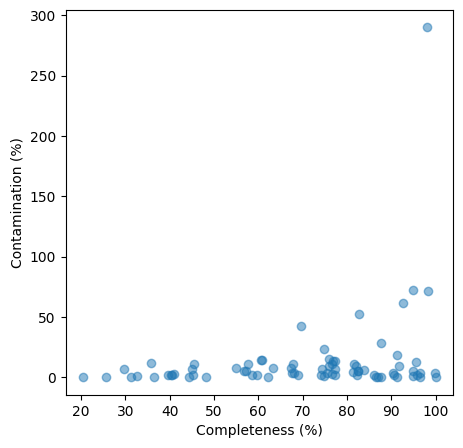

In [14]:
x = []
y = []

for mybin in metacoag_bins:
    x.append(metacoag_bins[mybin][0])
    y.append(metacoag_bins[mybin][1])
    
# Porphyromonas endodontalis

plt.figure(figsize=(5,5))

plt.scatter(x, y, alpha=0.5)
plt.ylabel("Contamination (%)")
plt.xlabel("Completeness (%)")
plt.show()
# plt.savefig('comp_vs_cont.png', format="png", dpi=300, bbox_inches='tight')
